In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [ ]:
!pip install distance

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup




<h2> 3.1 Reading data and basic stats </h2>

In [ ]:
df = pd.read_csv("drive/My Drive/FFRDB/QQPS/train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [ ]:
df.head()

id  qid1  ...                                          question2 is_duplicate
0   0     1  ...  What is the step by step guide to invest in sh...            0
1   1     3  ...  What would happen if the Indian government sto...            0
2   2     5  ...  How can Internet speed be increased by hacking...            0
3   3     7  ...  Find the remainder when [math]23^{24}[/math] i...            0
4   4     9  ...            Which fish would survive in salt water?            0

[5 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

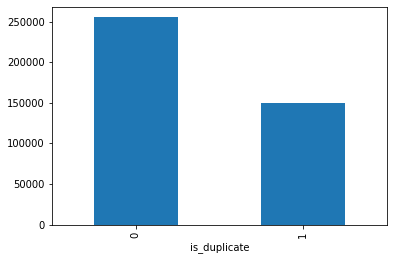

In [ ]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [ ]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [ ]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round((df['is_duplicate'].mean())*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


<h3> 3.2.2 Number of unique questions </h3>

In [ ]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



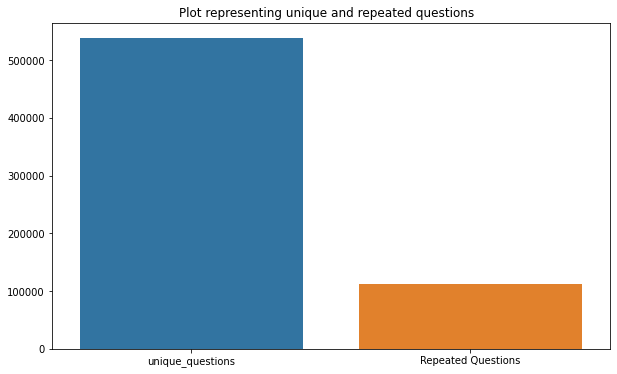

In [ ]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

<h3>3.2.3 Checking for Duplicates </h3>

In [ ]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



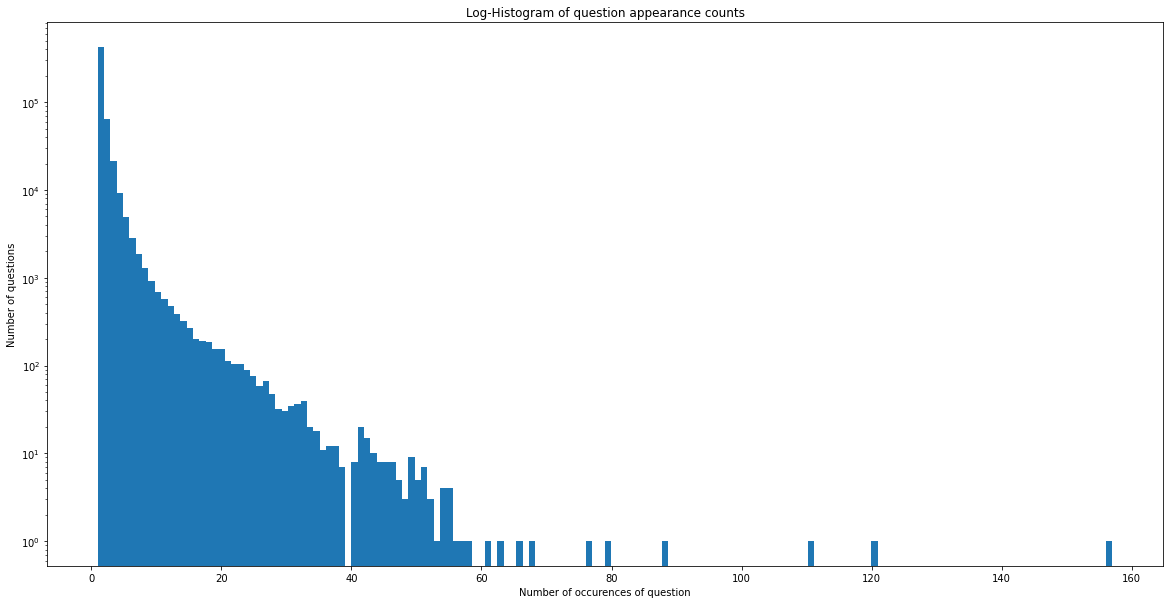

In [ ]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

<h3> 3.2.5 Checking for NULL values </h3>

In [ ]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


- There are three rows with null values in question2 

In [ ]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [ ]:
if os.path.isfile('drive/My Drive/FFRDB/QQPS/df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("drive/My Drive/FFRDB/QQPS/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

id  qid1  qid2  ... word_share freq_q1+q2  freq_q1-q2
0   0     1     2  ...   0.434783          2           0
1   1     3     4  ...   0.200000          5           3
2   2     5     6  ...   0.166667          2           0
3   3     7     8  ...   0.000000          2           0
4   4     9    10  ...   0.100000          4           2

[5 rows x 17 columns]

<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [ ]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


<h4> 3.3.1.1 Feature: word_share </h4>

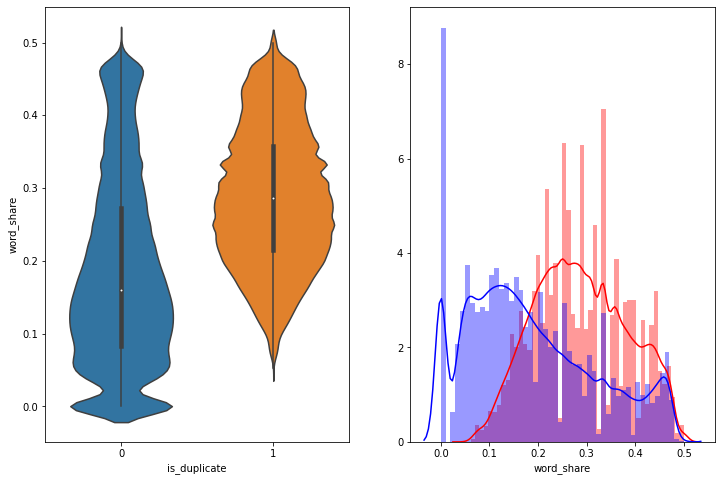

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

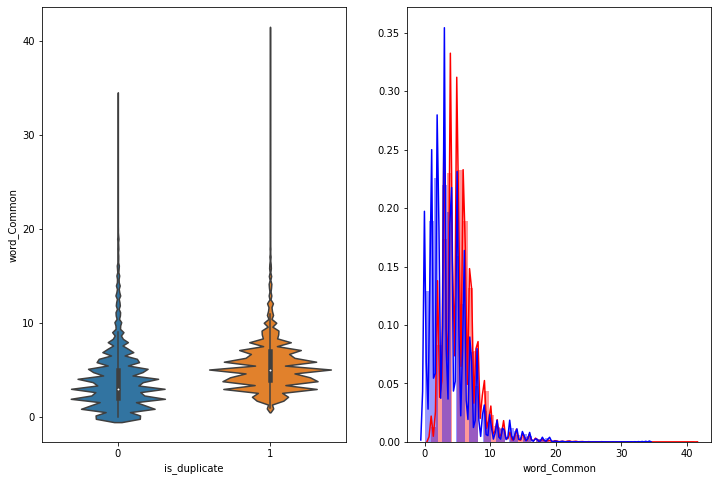

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

### 1.2.1 : EDA: Advanced Feature Extraction.


In [ ]:
!pip install fuzzywuzzy

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [ ]:
df.head(2)

id  qid1  qid2  ... word_share freq_q1+q2  freq_q1-q2
0   0     1     2  ...   0.434783          2           0
1   1     3     4  ...   0.200000          5           3

[2 rows x 17 columns]

<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [ ]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = set(stopwords.words('english'))


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [ ]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [ ]:
df=extract_features(df)

token features...
fuzzy features..


In [ ]:
df.head(2)

id  qid1  qid2  ... fuzz_ratio fuzz_partial_ratio  longest_substr_ratio
0   0     1     2  ...         93                100              0.982759
1   1     3     4  ...         66                 75              0.596154

[2 rows x 32 columns]

In [ ]:
# saving the features engineered with fuzzywuzzy module
df.to_csv('/content/drive/My Drive/FFRDB/QQPS/df_engineered.csv', encoding='utf-8', index=False)

<h3>3.5.1 Analysis of extracted features </h3>

<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [ ]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [ ]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16102750
Total number of words in non duplicate pair questions : 33187820


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


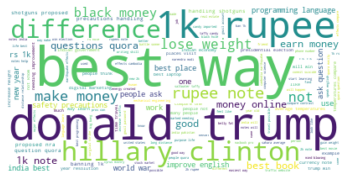

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


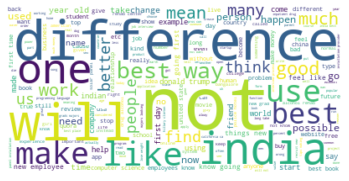

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

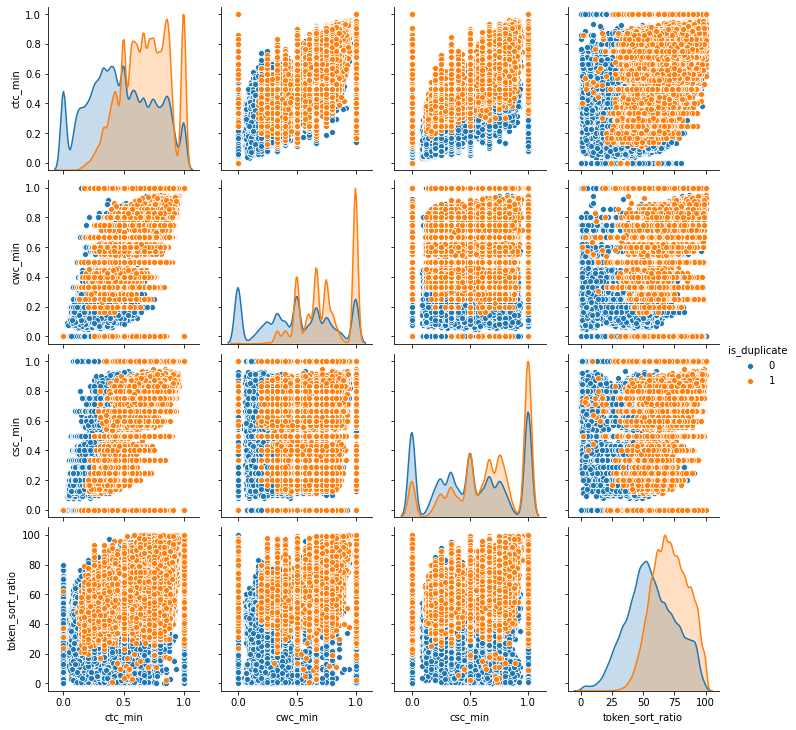

In [ ]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

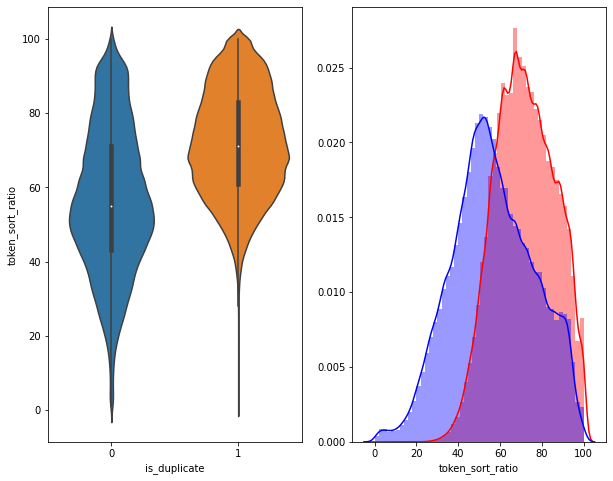

In [ ]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

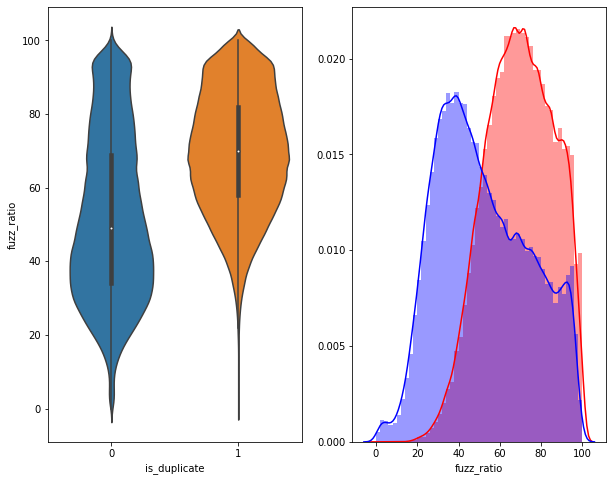

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>3.5.2 Visualization </h3>

In [ ]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [ ]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 0.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130355
[t-SNE] Computed conditional probabilities in 0.310s
[t-SNE] Iteration 50: error = 81.1824036, gradient norm = 0.0412865 (50 iterations in 2.359s)
[t-SNE] Iteration 100: error = 70.6358032, gradient norm = 0.0098833 (50 iterations in 1.750s)
[t-SNE] Iteration 150: error = 68.9236603, gradient norm = 0.0071206 (50 iterations in 1.764s)
[t-SNE] Iteration 200: error = 68.1187820, gradient norm = 0.0041608 (50 iterations in 1.763s)
[t-SNE] Iteration 250: error = 67.6162415, gradient norm = 0.0035118

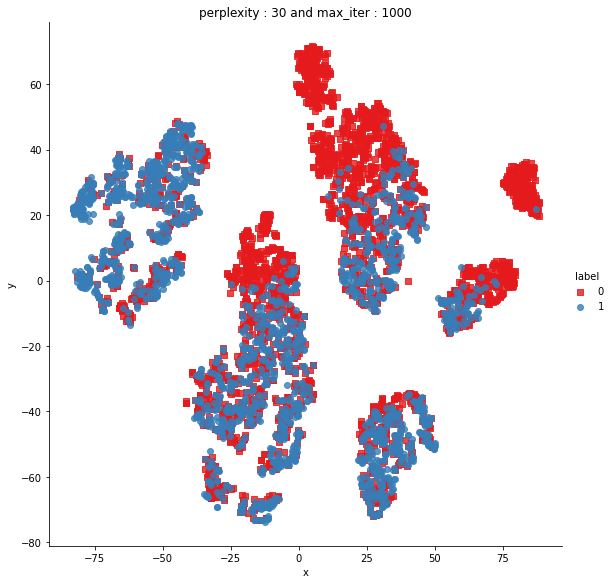

In [ ]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.021s...
[t-SNE] Computed neighbors for 5000 samples in 0.533s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130355
[t-SNE] Computed conditional probabilities in 0.337s
[t-SNE] Iteration 50: error = 80.6100159, gradient norm = 0.0323976 (50 iterations in 10.265s)
[t-SNE] Iteration 100: error = 69.4098053, gradient norm = 0.0034338 (50 iterations in 4.880s)
[t-SNE] Iteration 150: error = 68.0402451, gradient norm = 0.0018980 (50 iterations in 4.416s)
[t-SNE] Iteration 200: error = 67.4429932, gradient norm = 0.0011921 (50 iterations in 4.539s)
[t-SNE] Iteration 250: error = 67.1275864, gradient norm = 0.000997

In [ ]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
trace1 = go.Scatter3d(x=tsne3d[:,0],
                      y=tsne3d[:,1],
                      z=tsne3d[:,2],
                      mode = 'markers',
                      marker=dict(
                                  sizemode='diameter',
                                  color = y,
                                  colorscale = 'Portland',
                                  colorbar = dict(title = 'duplicate'),
                                  line=dict(color='rgb(255, 255, 255)'),
                                  opacity=0.75
                                  )
                      )
data = [trace1]

layout = dict(height=800, width=800, title='3d embedding with engineered features')

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
offline.iplot(fig, filename='3d-scatter-colorscale')

<h2> 3.6 Featurizing text data with tfidf vectors </h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy

In [ ]:
col_names = ['id','question1','question2','is_duplicate''freq_qid1', 'freq_qid2', 'q1len', 'q2len','q1_n_words', 'q2_n_words',
              'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq',
              'abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio']

dfr = pd.read_csv('/content/drive/My Drive/FFRDB/QQPS/final_features.csv',usecols=col_names)

In [ ]:
dfr['question1'] = dfr['question1'].apply(lambda x: str(x))
dfr['question2'] =dfr['question2'].apply(lambda x: str(x))

In [ ]:
dfr.head()

id  ... freq_q1-q2
0   0  ...          0
1   1  ...          3
2   2  ...          0
3   3  ...          0
4   4  ...          2

[5 rows x 30 columns]

In [ ]:
#selecting random 100k points from engineered df
df= dfr.sample(100000,random_state = 42)

In [ ]:
#splitting data in 70:30 ratio
from sklearn.model_selection import train_test_split
y_true=df['is_duplicate']
X_train,X_test, y_train, y_test = train_test_split(df.drop(['is_duplicate'],axis=1),y_true, stratify=y_true, test_size=0.3)


q=X_train['question1']+X_train['question2']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False)
q=tfidf.fit_transform(q.values.astype('U'))

print(type(q))
print(q.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(70000, 48016)


In [ ]:
# #splitting data in 70:30 ratio
# from sklearn.model_selection import train_test_split
# y_true=df['is_duplicate']
# X_train,X_test, y_train, y_test = train_test_split(df.drop(['is_duplicate'],axis=1),y_true, stratify=y_true, test_size=0.3)

# from sklearn.feature_extraction.text import TfidfVectorizer
# t1 = TfidfVectorizer(lowercase=False, max_features=20000)
# t2 = TfidfVectorizer(lowercase=False, max_features=20000)
# q1=X_train['question1']
# q2=X_train['question2']
# q1=t1.fit_transform(q1.values.astype('U'))
# q2=t2.fit_transform(q2.values.astype('U'))

# print(type(q1))
# print(q1.shape)

# print(type(q2))
# print(q2.shape)

In [ ]:
# X_train = X_train.drop(['id','question1','question2'], axis=1, inplace=False)
# print(type(X_train))
# print(X_train.shape)
# from scipy.sparse import hstack
# X_train=hstack((X_train.values.astype('float64'),q1,q2))             

In [ ]:
# print(type(X_train))
# print(X_train.shape)

In [ ]:
X_train = X_train.drop(['id','question1','question2'], axis=1, inplace=False)
print(type(X_train))
print(X_train.shape)
from scipy.sparse import hstack
X_train=hstack((X_train.values.astype('float64'),q))             

<class 'pandas.core.frame.DataFrame'>
(70000, 26)


In [ ]:
print(type(X_train))
print(X_train.shape)

<class 'scipy.sparse.coo.coo_matrix'>
(70000, 48042)


In [ ]:
q=X_test['question1']+X_test['question2']
q=tfidf.transform(q.values.astype('U'))
X_test= X_test.drop(['id','question1','question2'], axis=1, inplace=False)
print(type(X_test))
print(X_test.shape)
from scipy.sparse import hstack
X_test=hstack((X_test.values.astype('float64'),q))      
print(X_test.shape)       

<class 'pandas.core.frame.DataFrame'>
(30000, 26)
(30000, 48042)


In [ ]:
# q1=X_test['question1']
# q2=X_test['question2']
# q1=t1.transform(q1.values.astype('U'))
# q2=t2.transform(q2.values.astype('U'))

# print(type(q1))
# print(q1.shape)

# print(type(q2))
# print(q2.shape)

# X_test= X_test.drop(['id','question1','question2'], axis=1, inplace=False)
# print(type(X_test))
# print(X_test.shape)


# from scipy.sparse import hstack
# X_test=hstack((X_test.values.astype('float64'),q1,q2))      
# print(X_test.shape)       

<h1>4. Machine Learning Models </h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [ ]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 48042)
Number of data points in test data : (30000, 48042)


In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6287857142857143 Class 1:  0.3712142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.6288 Class 1:  0.3712


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.1 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8876518361856293


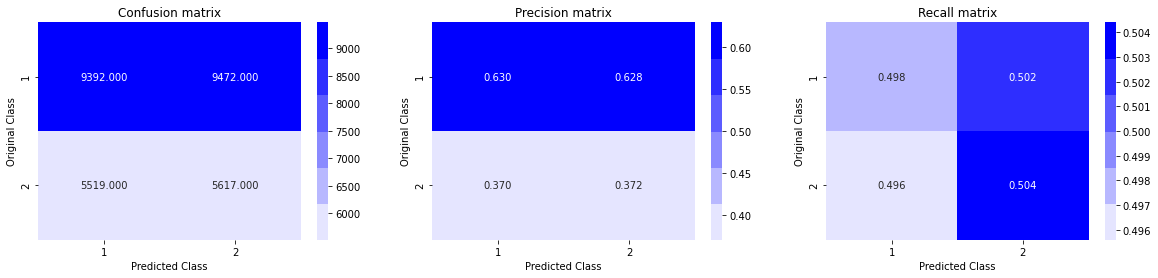

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.2 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-07 The log loss is: 0.6595912557183435
For values of alpha =  1e-06 The log loss is: 0.41923506954584866
For values of alpha =  1e-05 The log loss is: 0.42019025547219574
For values of alpha =  0.0001 The log loss is: 0.4125722301393711
For values of alpha =  0.001 The log loss is: 0.41775707148897534
For values of alpha =  0.01 The log loss is: 0.4417081194399419
For values of alpha =  0.1 The log loss is: 0.45872652874678865
For values of alpha =  1 The log loss is: 0.49512361121496384
For values of alpha =  10 The log loss is: 0.5466125982664314
For values of alpha =  100 The log loss is: 0.5890170084805283
For values of alpha =  1000 The log loss is: 0.6236374170317959
For values of alpha =  10000 The log loss is: 0.6580656962534861
For values of alpha =  100000 The log loss is: 0.6594489635565819


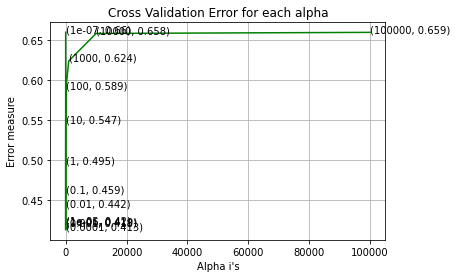

For values of best alpha =  0.0001 The train log loss is: 0.4158402137620509
For values of best alpha =  0.0001 The test log loss is: 0.4125722301393711
Total number of data points : 30000


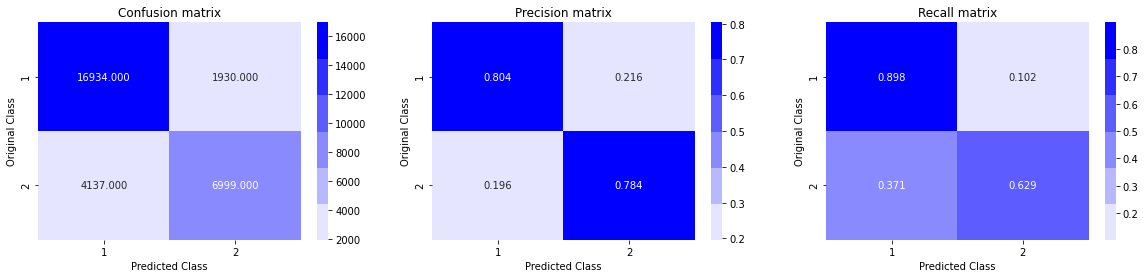

In [ ]:
alpha = [10 ** x for x in range(-7, 6)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.3 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-10 The log loss is: 0.6595912557183435
For values of alpha =  1e-09 The log loss is: 0.6595912557183435
For values of alpha =  1e-08 The log loss is: 0.6595912557183435
For values of alpha =  1e-07 The log loss is: 0.6595912557183435
For values of alpha =  1e-06 The log loss is: 0.41784317974589313
For values of alpha =  1e-05 The log loss is: 0.4312542418962396
For values of alpha =  0.0001 The log loss is: 0.4491256502859636
For values of alpha =  0.001 The log loss is: 0.47913550831501245
For values of alpha =  0.01 The log loss is: 0.5041753149219105
For values of alpha =  0.1 The log loss is: 0.47877881913326525
For values of alpha =  1 The log loss is: 0.5805320242642087
For values of alpha =  10 The log loss is: 0.6545234068021872
For values of alpha =  100 The log loss is: 0.6595912538683333
For values of alpha =  1000 The log loss is: 0.6595912538683333
For values of alpha =  10000 The log loss is: 0.6595912538683334
For values of alpha =  100000 The 

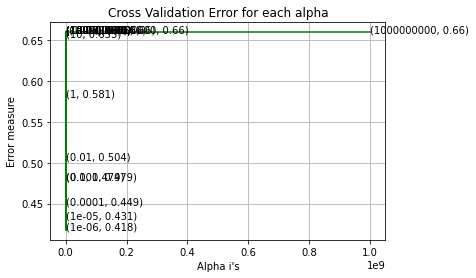

For values of best alpha =  1e-06 The train log loss is: 0.4154833339560747
For values of best alpha =  1e-06 The test log loss is: 0.41784317974589313
Total number of data points : 30000


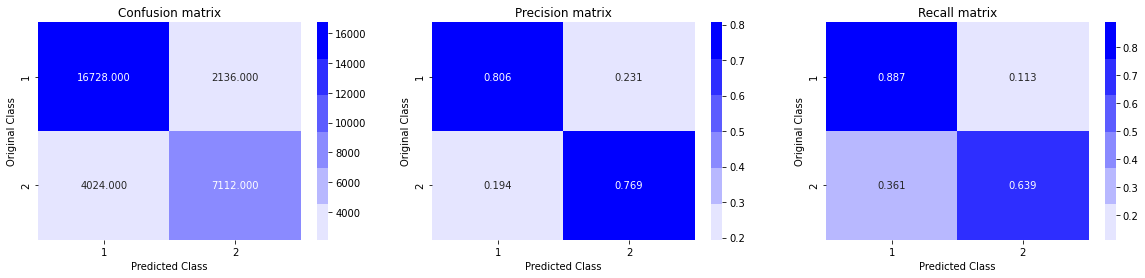

In [ ]:
alpha = [10 ** x for x in range(-10, 10)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 XGBoost </h2>

Trying XGBoost with the same data of low dimensionality (26 features).

In [160]:
# loading the dataframe with all the 32 features(will exclude 6 featurea later in the section)
dfr = pd.read_csv('/content/drive/My Drive/FFRDB/QQPS/df_engineered.csv')

In [161]:
dfr.head(2)

id  qid1  qid2  ... fuzz_ratio fuzz_partial_ratio  longest_substr_ratio
0   0     1     2  ...         93                100              0.982759
1   1     3     4  ...         66                 75              0.596154

[2 rows x 32 columns]

In [162]:
dfr.shape

(404290, 32)

In [163]:
dfr['question1'] = dfr['question1'].apply(lambda x: str(x))
dfr['question2'] =dfr['question2'].apply(lambda x: str(x))

In [176]:
#selecting random 100k points from engineered df
df= dfr.sample(100000,random_state = 42)

In [177]:
#splitting data in 70:30 ratio
from sklearn.model_selection import train_test_split
y_true=df['is_duplicate']
X_train,X_test, y_train, y_test = train_test_split(df.drop(['is_duplicate'],axis=1),y_true, stratify=y_true, test_size=0.3)

In [178]:
print(X_train['question2'].shape)

(70000,)


In [179]:
q_tr=X_train['question1']+X_train['question2']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False)
tfidf.fit_transform(q_tr.values.astype('U'))

print(type(q_tr))
print(q_tr.shape)

word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
print(len(word2tfidf.keys()))

<class 'pandas.core.series.Series'>
(70000,)
39230


In [180]:
import spacy
from tqdm.notebook import tqdm

nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(q_tr):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)

In [183]:
# import pickle
# import os
# dbfile1 = open('/content/drive/My Drive/FFRDB/QQPS/vecs1.pkl', 'wb')
# pickle.dump(vecs1, dbfile1)
# dbfile1.close()
dbfile1 = open('/content/drive/My Drive/FFRDB/QQPS/vecs1.pkl', 'rb')
vecs1 = pickle.load(dbfile1)

In [184]:
print(vecs1[0].shape)
print(len(vecs1))

(96,)
70000


In [185]:
X_train = X_train.drop(['id','question1','question2','qid1','qid2'], axis=1, inplace=False)
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(70000, 26)


In [186]:
# from scipy.sparse import hstack
X_train=np.hstack((X_train,vecs1))             

print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(70000, 122)


In [187]:
X_train

array([[  2.        ,   2.        ,  30.        , ..., -42.47545099,
        -32.45668934,  53.28929937],
       [  1.        ,   1.        ,  50.        , ...,  62.99897121,
          3.65848684,  77.38810858],
       [  1.        ,   1.        ,  64.        , ...,  17.58838826,
        -10.92655634, 177.56993628],
       ...,
       [  1.        ,   4.        ,  98.        , ..., 299.90713775,
          6.32110521,  77.88651267],
       [  2.        ,   1.        ,  51.        , ...,  11.00503543,
         12.2020666 ,  79.49300515],
       [  5.        ,  13.        ,  44.        , ..., 138.07810807,
        -94.58590156,   1.85523719]])

In [188]:
q_ts=X_test['question1']+X_test['question2']

In [189]:
nlp = spacy.load('en_core_web_sm')

vecs2 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(q_ts)):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs2.append(mean_vec1)

In [190]:
# dbfile1 = open('/content/drive/My Drive/FFRDB/QQPS/vecs2.pkl', 'wb')
# pickle.dump(vecs2, dbfile1)
# dbfile1.close()
dbfile1 = open('/content/drive/My Drive/FFRDB/QQPS/vecs2.pkl', 'rb')
vecs2 = pickle.load(dbfile1)

In [191]:
print(vecs2[0].shape)
print(len(vecs2))

(96,)
30000


In [192]:
X_test= X_test.drop(['id','question1','question2','qid1','qid2'], axis=1, inplace=False)
print(type(X_test))
print(X_test.shape)  

<class 'pandas.core.frame.DataFrame'>
(30000, 26)


In [193]:
X_test=hstack((X_test,vecs2))      
print(X_test.shape)     

(30000, 122)


In [194]:
X_test

<30000x122 sparse matrix of type '<class 'numpy.float64'>'
	with 3584649 stored elements in COOrdinate format>

In [ ]:
lr=[0.001, 0.01, 0.1,]
depth=range(1,4)
estimators=range( 450, 500,5)


params = {
        'learning_rate': lr,
        'max_depth': depth,
        'n_estimators' : estimators,
        }



from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier as xgbc

clf=xgbc(objective='binary:logistic',eval_metric='logloss', n_jobs=-1, early_stopping_rounds=10)
temp_gscv= RandomizedSearchCV(clf,params,cv=3,verbose=10,n_jobs=-1,scoring='neg_log_loss')
temp_gscv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 65.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 118.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 165.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 244.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 351.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=10,
                                           eval_metric='logloss', gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logi...
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                              

In [ ]:
print(temp_gscv.best_score_)
temp_gscv.best_params_

-0.3837804072277609


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 480}

In [ ]:
from xgboost import XGBClassifier



clf=XGBClassifier(objective='binary:logistic',eval_metric = 'logloss', early_stopping_rounds=10,
                  max_depth=3,n_estimators=480,
                  learning_rate=0.01, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=10,
                                                    eval_metric='logloss',
                                                    gamma=0, learning_rate=0.01,
                                                    max_delta_step=0,
                                                    max_depth=3,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=480, n_jobs=-1,
                                                    nthre

Log loss for tfidf train data :  0.37781699301995414
Log loss for tfidf test data :  0.38134416705472673


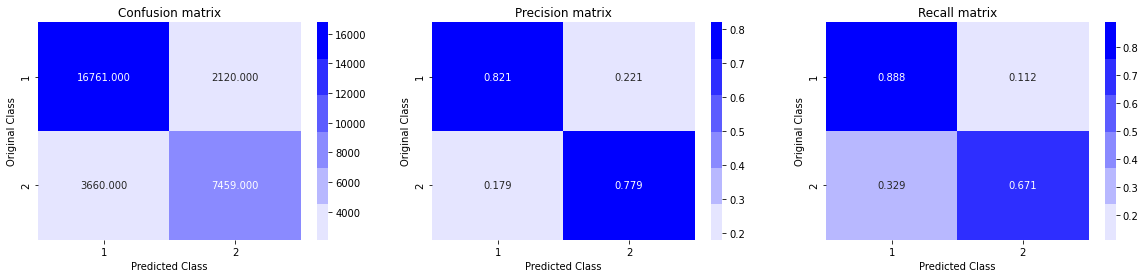

In [ ]:
predict_y = sig_clf.predict_proba(X_train)
print("Log loss for tfidf train data : ",log_loss(y_train, predict_y,  eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print("Log loss for tfidf test data : ",log_loss(y_test, predict_y,  eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
lr=[0.001, 0.01, 0.1,]
depth=range(1,6)
estimators=range( 50, 150,5)


params = {
        'learning_rate': lr,
        'max_depth': depth,
        'n_estimators' : estimators,
        }



from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier as xgbc

clf=xgbc(objective='binary:logistic',eval_metric='logloss', n_jobs=-1, early_stopping_rounds=10)
temp_gscv= RandomizedSearchCV(clf,params,cv=2,verbose=10,n_jobs=-1,scoring='neg_log_loss')
temp_gscv.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 30.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 30.1min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=10,
                                           eval_metric='logloss', gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logi...
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                              

In [ ]:
print(temp_gscv.best_score_)
temp_gscv.best_params_

-0.5170967297845653


{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 110}

In [195]:
lr=[0.001, 0.01, 0.1,]
depth=range(2,6)
estimators=range( 70, 110,5)
gamma=[.1,.25,.5]

params = {
        'learning_rate': lr,
        'max_depth': depth,
        'n_estimators' : estimators,
        }



from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier as xgbc

clf=xgbc(objective='binary:logistic',eval_metric='logloss', n_jobs=-1, early_stopping_rounds=10)
temp_gscv= GridSearchCV(clf,params,cv=2,verbose=10,n_jobs=-1,scoring='neg_log_loss')
temp_gscv.fit(X_train,y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 50

GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     early_stopping_rounds=10,
                                     eval_metric='logloss', gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01,

In [196]:
print(temp_gscv.best_score_)
temp_gscv.best_params_

-0.3471209928871172


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 105}

In [197]:
from xgboost import XGBClassifier
clf=XGBClassifier(objective='binary:logistic', max_depth=5,n_estimators=105, learning_rate=0.1, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=105, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state

Log loss for tfidf train data :  0.32345026757896195
Log loss for tfidf test data :  0.3544065343663843


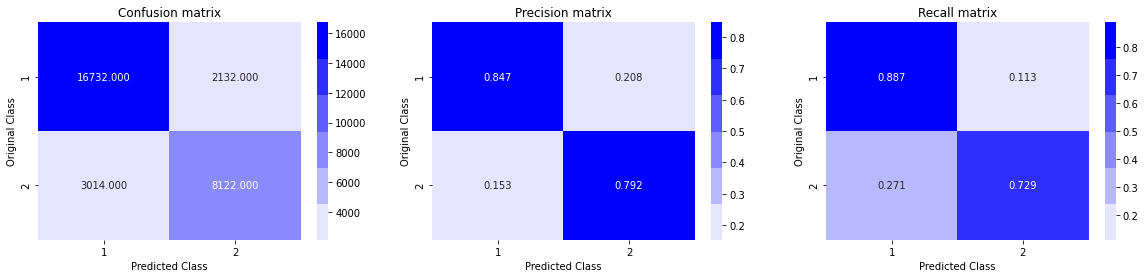

In [198]:
predict_y = sig_clf.predict_proba(X_train)
print("Log loss for tfidf train data : ",log_loss(y_train, predict_y,  eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print("Log loss for tfidf test data : ",log_loss(y_test, predict_y,  eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [199]:
from xgboost import XGBClassifier



clf=XGBClassifier(objective='binary:logistic', max_depth=5,n_estimators=90, learning_rate=0.2, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.2,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=90, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=

Log loss for tfidf train data :  0.29499575696879904
Log loss for tfidf test data :  0.34944388617480465


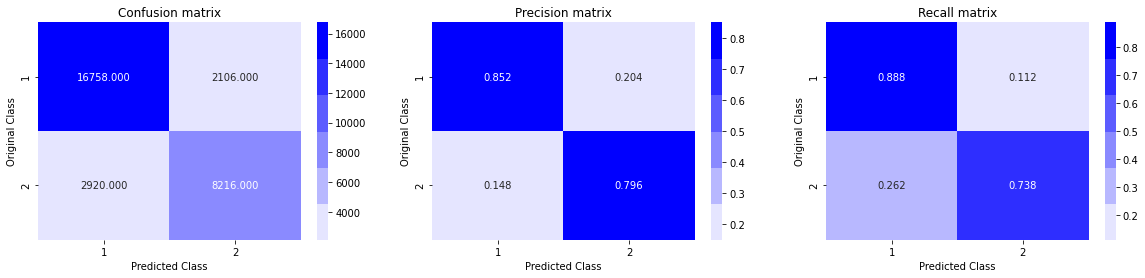

In [200]:
predict_y = sig_clf.predict_proba(X_train)
print("Log loss for tfidf train data : ",log_loss(y_train, predict_y,  eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print("Log loss for tfidf test data : ",log_loss(y_test, predict_y,  eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Work Flow </h1>

The presented notebook shows a simple work flow to answere a kaggle compition, Qura question pair similariy. Quora is a questionaire platform visited in millions every month. Hence, many of the Question asked on Quora has already been previously asked and answered. Our job here is to detect similarity between questions so that repeated questions can be addressed in a short while.

1. The data overview shows data contains 5 columns : qid1, qid2, question1, question2, is_duplicate with 404,290 data-points. 
2. This is a binary Classification problem which tries to predict if given pair of questions are similar or not.
3. Starting with simple EDA on data to check the distribution of Classes, and frequency of questions.
4. Now with the ordinary insights, and without preprocessing of data we extract some simple features and perfrom eda like box plots and histograms with pdfs to see if these features can be leveraged for classification purpose.
5. The data is now preprocessed for stopword removal, lemetization and etc so some 15 odd advance features can be extracted from it using the Fuzzy module, and these are also monitored for helpfulness in classification job by eda.
6. The whole data set now has 30 odd dimensions.
7. This high deimensional dataset is embedded in to 2-D and 3-D usind T-sNe to get a visual representation of it for a broad idea.
8. The next step is adding another layer of featurization to data in form of TFIDF vector, with proper splitting of data to avoid data leakage. 
9. This Vectorization is done by considering the corpus of both questions in a data-point so as to get a sense of which word appears more in similar and dissimilar questions pair. 
10. This high dimensional data is now fed to Logistic Regression and Linear SVM which are designed to handle these kind of data. The results are observed.
11. Another featurization is tried on data with TFIDF W2V with spacy module's glove implementation to keep the dimensionality of data in check.
12. This low dimensional data is fed to the XGBOOST model as it handles these kind of data very well. The reults are recorded.
13. All the Machine Learning models are hyperparameter tuned.



# Observations

In [201]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Vectorizer", "Train log loss", "Test log loss"]

x.add_row(["Random model",'NAN', 0.8876,0.8876])
x.add_row(["Logistic Regression",'TF-IDF ', 0.4158,0.4125])
x.add_row(["Linear SVM", 'TF-IDF ', 0.4154, 0.4178])
x.add_row(["XGBoost(105 estimators)", 'TF-IDF W2V ', 0.3234, 0.3544])
x.add_row(["XGBoost(90 estimators)", 'TF-IDF W2V ', 0.2949, 0.3494])
print(x)

+-------------------------+-------------+----------------+---------------+
|          Model          |  Vectorizer | Train log loss | Test log loss |
+-------------------------+-------------+----------------+---------------+
|       Random model      |     NAN     |     0.8876     |     0.8876    |
|   Logistic Regression   |   TF-IDF    |     0.4158     |     0.4125    |
|        Linear SVM       |   TF-IDF    |     0.4154     |     0.4178    |
| XGBoost(105 estimators) | TF-IDF W2V  |     0.3234     |     0.3544    |
|  XGBoost(90 estimators) | TF-IDF W2V  |     0.2949     |     0.3494    |
+-------------------------+-------------+----------------+---------------+
